<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/LS_DS_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

## Loading dataset

In [0]:
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
tf.__version__

'1.15.0'

In [5]:
url = "https://raw.githubusercontent.com/Tclack88/DS-Unit-4-Sprint-2-Neural-Networks/master/module3-Intro-to-Keras/amesHousePrice.csv"
df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import seaborn as sb

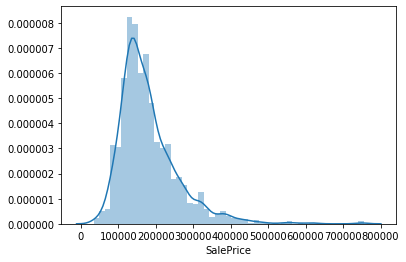

In [7]:
sb.distplot(df.SalePrice);

In [0]:
!pip install category_encoders

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [0]:
df = df.drop(columns = ['Id']) # Id has no correlation

In [0]:
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']#.to_numpy().reshape(-1,1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
# get target data as column vectors
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [0]:
pipeline = Pipeline([('encoder', ce.OrdinalEncoder()),
                     ('imputer',SimpleImputer(strategy='mean')),
                     ('normalizer', Normalizer())])

In [0]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [17]:
X_train

array([[1.64852278e-02, 1.37376899e-04, 6.86884493e-03, ...,
        2.75852812e-01, 1.37376899e-04, 1.37376899e-04],
       [9.00140106e-03, 2.11797672e-04, 7.41291852e-03, ...,
        2.12538964e-01, 2.11797672e-04, 2.11797672e-04],
       [2.08284005e-02, 1.73570004e-04, 6.42209014e-03, ...,
        3.48181428e-01, 3.47140008e-04, 3.47140008e-04],
       ...,
       [6.99695598e-03, 3.73170985e-04, 5.59756478e-03, ...,
        1.87331835e-01, 1.86585493e-04, 1.86585493e-04],
       [1.86608025e-03, 1.86608025e-04, 6.06476081e-03, ...,
        1.87354457e-01, 1.86608025e-04, 1.86608025e-04],
       [1.16218154e-02, 1.93696923e-04, 6.10145308e-03, ...,
        1.94471711e-01, 1.93696923e-04, 1.93696923e-04]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model = Sequential()
model.add(Dense(10, input_dim=79, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                800       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [0]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [23]:
model.fit(X_train, y_train, epochs=1000, verbose=1, callbacks=callback_list)

Train on 1095 samples
Epoch 1/1000
1095/1095 [==============================] - 0s 48us/sample - loss: 6309039229.7790 - mean_squared_error: 6309038592.0000
Epoch 2/1000
1095/1095 [==============================] - 0s 41us/sample - loss: 6305882682.4475 - mean_squared_error: 6305882624.0000
Epoch 3/1000
1095/1095 [==============================] - 0s 38us/sample - loss: 6302942143.7078 - mean_squared_error: 6302942208.0000
Epoch 4/1000
1095/1095 [==============================] - 0s 41us/sample - loss: 6299780384.9644 - mean_squared_error: 6299780096.0000
Epoch 5/1000
1095/1095 [==============================] - 0s 40us/sample - loss: 6296936380.2009 - mean_squared_error: 6296936448.0000
Epoch 6/1000
1095/1095 [==============================] - 0s 37us/sample - loss: 6294211040.7890 - mean_squared_error: 6294210560.0000
Epoch 7/1000
1095/1095 [==============================] - 0s 40us/sample - loss: 6290920105.2639 - mean_squared_error: 6290919936.0000
Epoch 8/1000
1095/1095 [=========

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.